## Solution for 4.33 Design Problem:
### ENGR/Physics COCC
#### Bruce Emerson 4/16/21

This problem comes from HW3 and is an exploration of a design solution for a trailer hitch

A hitch is designed for a maximum load of 3600 lb. The design is a solid square bar that fits into a square tube and is held in place with a pin as shown in the following image.

<img src="https://raw.githubusercontent.com/smithrockmaker/ENGR213/master/Applications/data/ENGR213Design1.png" width="500"/>

The allowable axial stress on the bar is 6 ksi, the allowable shear stress on the pin is 10 ksi, and the allowable axial stress on the receiver tube is 12 ksi. 

Determine the cross sectional dimensions (to closest 1/16") for the pin, the bar, and the tube.

### Freebody Diagram (labels):

Here is my initial sketch of the relevant features of this problem. Note that I have arbitrarily assigned a clearance between the receiving tube and the drawbar of 0.037" (1/32").

<img src="https://raw.githubusercontent.com/smithrockmaker/ENGR213/master/Applications/data/Design1FBD.JPG" width="600"/>

### Dependencies

These are our usual plotting and calculating dependencies.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Define Design Variables:

There are various design parameters for this problem based on the freebody diagram above. For each parameter there are probably limits that I will define so that I can generate a linear space (np.linspace) of possible values for calculation.

1. widthTube: min = 0.5", max = 2.5" - might need to go further
1. thickTube: min = .1", max = .2"
1. clearTube: = 0.037" (1/32")
1. widthBar: = widthTube - 2\*clearTube - assume that bar is always close fit to tube
1. pinDiameter: min = 0.25", max = 0.5"
1. smaxTube = 12. (ksi)
1. smaxBar = 6. (ksi)
1. smaxPin = 10. (ksi)
1. maxLoad = 3600 (lbs) - defined by problem

### Relationships:

.$$\large \sigma_{Tube} = 3600/[(W_{Tube}+t_{Tube})^2 - W_{Tube}^2]$$

.$$\large \sigma_{Bar} = 3600/(W_{Bar}^2)$$

.$$\large \sigma_{Pin} = 3600/[2 (\pi\: (pin_{dia}/2)^2]$$

In [2]:
# implementing definitions above
# ranges first

minTube = 0.5 # in inches
maxTube = 2.5 # in inches
minTubeThick = 0.1
maxTubeThick = 0.2
clearance = 0.037  # clearance between bar and tube in inches
minPin = 0.35 # in inches and bounded by width of bar.

# design limits on stress

smaxTube = 12. # in ksi
smaxBar = 6. # in ksi
smaxPin = 10. # in ksi
actualLoad = 3600. # in lbs

# factor of safety
FOS = 1.5

# design load

designLoad = actualLoad*FOS

### Approach to Design:

I have had a fascinating journey sorting out how to approach this design problem using the tools available in python. I keep having to resist the urge to try to generate a complex multidimensional solution rather than the more pragmatic approach of resolving one part of the problem at a time.

### Pragmatic:

The pragmatic approach is to determine what can be determined and then use that information to impact my next choice. In this case the simplest constraint to visualize is the potential shear failure of the pin. Let's sort out what the minimum diameter of the pin is for the conditions stated.


In [3]:
# number of data points
numPts = 50

# the pin array
diaPin = np.linspace(minPin,3*minPin,numPts)

# shear area of pin
areaPin = 2.*np.pi*(diaPin/2)**2 # 2 shear surfaces

# shear stress on pin.
shearPin = (designLoad/areaPin)/1000.

# diaPin

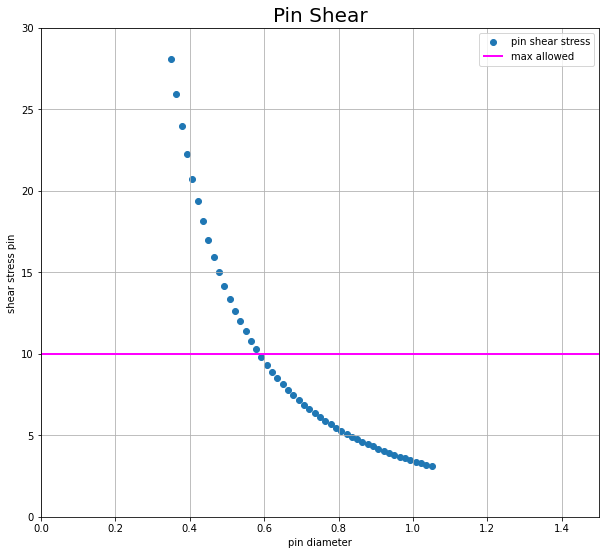

In [4]:
# Pin plot
fig1, ax1 = plt.subplots()
ax1.scatter(diaPin, shearPin, label = "pin shear stress")

ax1.hlines(smaxPin, 0, 2,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "max allowed")

# a more explicit way to set labels
plt.xlabel('pin diameter', fontsize = 10)
plt.ylabel('shear stress pin', fontsize = 10)
plt.title('Pin Shear', fontsize = 20)

# controlling x and y limits on plot show a detail if desired
plt.xlim([0, 1.5])
plt.ylim([0, 30])

fig1.set_size_inches(10, 9)
ax1.grid()
plt.legend(loc= 1)

#fig1.savefig("myplot.png")
plt.show()

### Move Design Forward:

Using the previous plot I can decide what a reasonable pin diameter is for my design. What I see is that any diameter over about 0.6" will meet the design criteria (including the FOS).

Now do the same for the receiver tube....


In [5]:
# number of data points
numPts = 50

# number of tube thicknesses to explore
numThick = 5 # if this is changed many things need to change below
tubeThick = np.linspace(minTubeThick,maxTubeThick,numThick)
    

# the tube array
innerTube = np.linspace(minTube,maxTube,numPts)

# area of tube wall
areaTube1 = (innerTube+tubeThick[0])**2 - (innerTube)**2
areaTube2 = (innerTube+tubeThick[1])**2 - (innerTube)**2
areaTube3 = (innerTube+tubeThick[2])**2 - (innerTube)**2
areaTube4 = (innerTube+tubeThick[3])**2 - (innerTube)**2
areaTube5 = (innerTube+tubeThick[4])**2 - (innerTube)**2

# shear stress on pin.
stressTube1 = (designLoad/areaTube1)/1000.
stressTube2 = (designLoad/areaTube2)/1000.
stressTube3 = (designLoad/areaTube3)/1000.
stressTube4 = (designLoad/areaTube4)/1000.
stressTube5 = (designLoad/areaTube5)/1000.

# 

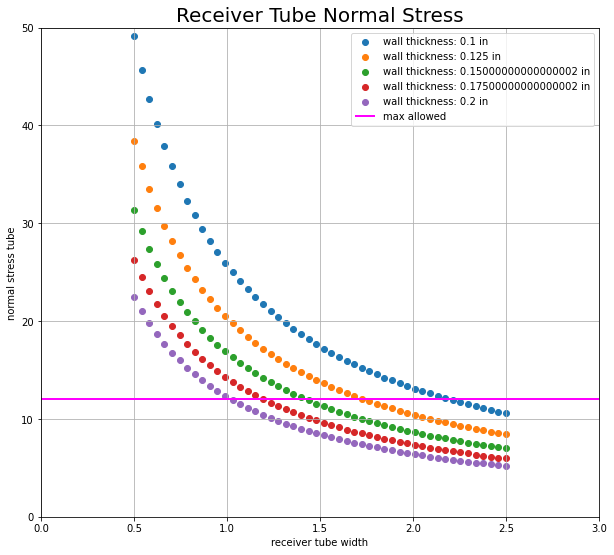

In [6]:
# Tube plot
fig2, ax2 = plt.subplots()
ax2.scatter(innerTube, stressTube1, label = "wall thickness: "+str(tubeThick[0])+" in")
ax2.scatter(innerTube, stressTube2, label = "wall thickness: "+str(tubeThick[1])+" in")
ax2.scatter(innerTube, stressTube3, label = "wall thickness: "+str(tubeThick[2])+" in")
ax2.scatter(innerTube, stressTube4, label = "wall thickness: "+str(tubeThick[3])+" in")
ax2.scatter(innerTube, stressTube5, label = "wall thickness: "+str(tubeThick[4])+" in")

# plot limit line
ax2.hlines(smaxTube, 0, 3,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "max allowed")

# a more explicit way to set labels
plt.xlabel('receiver tube width', fontsize = 10)
plt.ylabel('normal stress tube', fontsize = 10)
plt.title('Receiver Tube Normal Stress', fontsize = 20)

# controlling x and y limits on plot show a detail if desired
plt.xlim([0, 3.])
plt.ylim([0, 50])

fig2.set_size_inches(10, 9)
ax2.grid()
plt.legend(loc= 1)

#fig2.savefig("myplot.png")
plt.show()

### Iterating Back:

In running the previous plot I found that my original assumptions about possible thicknesses for the receiver tube wall were a bit enthusiastic (.3" - .5 "). I went back and modified the ranges until I had a useful set of possibilities to consider. The above plots suggest that using a 2" receiver tube with 5/16" would meet my safety factor. I could push it and use a 1.5" receiver and still be within the FOS. It feels like the draw bar (of solid steel) is NOT going to be the constraining factor.

In [7]:
# number of data points
numPts = 50   

# the bar array - same range as tube
widthBar = np.linspace(minTube,maxTube,numPts)

# area of tube wall
areaBar = (widthBar-2*clearance)**2


# shear stress on pin.
stressBar = (designLoad/areaBar)/1000.

# 

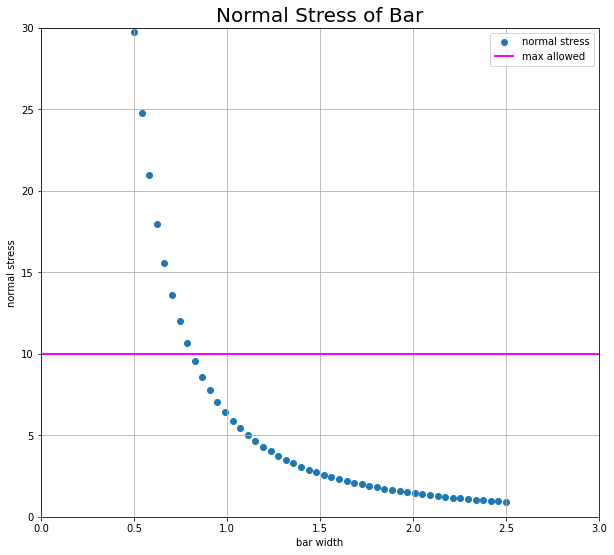

In [8]:
# Pin plot
fig3, ax3 = plt.subplots()
ax3.scatter(widthBar, stressBar, label = "normal stress")

ax3.hlines(smaxPin, 0, 3,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "max allowed")

# a more explicit way to set labels
plt.xlabel('bar width', fontsize = 10)
plt.ylabel('normal stress', fontsize = 10)
plt.title('Normal Stress of Bar', fontsize = 20)

# controlling x and y limits on plot show a detail if desired
plt.xlim([0, 3.])
plt.ylim([0, 30])

fig3.set_size_inches(10, 9)
ax3.grid()
plt.legend(loc= 1)

#fig3.savefig("myplot.png")
plt.show()

### Summary

For me, with a FOS of 1.5, a pin of .75" diameter easily meets the design criteria. A 1.5" receiver tube with 3/16" walls also easily meets design criteria. The square drawbar is not the limiting factor in any model for this design. A 2" receiver with 1/8" walls would also meet design criteria. The cost differential might be the deciding factor.

BE 4/18/21